<a href="https://colab.research.google.com/github/usshaa/BB_ML_Notebooks/blob/main/02-Supervised%20Learning%20Algorithm/Regression/09_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regularization

Regularization is a technique used in machine learning to prevent overfitting by adding a penalty term to the model's loss function. Overfitting occurs when a model learns the noise in the training data rather than the actual underlying patterns. Regularization techniques help ensure that the model generalizes well to new, unseen data.

There are two main types of regularization: **L1 (Lasso) regularization** and **L2 (Ridge) regularization**.

#### L2 Regularization (Ridge Regression)
L2 regularization adds a penalty equal to the sum of the squared coefficients to the loss function. It effectively shrinks the coefficients, but not to zero, which helps keep the model simple and prevents overfitting.

The loss function for linear regression with L2 regularization (Ridge regression) is:

\$ J(\theta) = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{n} \theta_j^2 \$

where:
- \( y_i \) is the actual output.
- \( \hat{y}_i \) is the predicted output.
- \( \theta_j \) are the model parameters (coefficients).
- \( \lambda \) is the regularization parameter, controlling the strength of the penalty.

#### L1 Regularization (Lasso Regression)
L1 regularization adds a penalty equal to the sum of the absolute values of the coefficients to the loss function. This can result in some coefficients being exactly zero, effectively performing feature selection.

The loss function for linear regression with L1 regularization (Lasso regression) is:

\$ J(\theta) = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{n} |\theta_j| \$

where:
- The terms are the same as in L2 regularization, but the penalty is the sum of the absolute values of the coefficients.

### Example

Imagine you are trying to predict the price of a house based on its size and number of rooms. You have a dataset with features like size (in square feet), number of rooms, age of the house, distance to the nearest school, and so on.

If you fit a linear regression model without regularization, it might produce a model that fits the training data very well but performs poorly on new data (overfitting). This happens because the model captures the noise in the training data.

By adding a regularization term, we can penalize large coefficients and thus prevent the model from overfitting.

For example:
- **L2 regularization** will shrink all the coefficients, making the model more general but keeping all features in the model.
- **L1 regularization** might set some coefficients to zero, effectively removing some features from the model, which can be particularly useful if you suspect that many features are irrelevant.

### Practical Implementation

Let's see how to implement Ridge and Lasso regression using Python and scikit-learn.

#### Step-by-Step Implementation

1. **Import Necessary Libraries:**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

2. **Load Dataset:**

For simplicity, we will use a synthetic dataset.

In [ ]:
# Generating a synthetic dataset
np.random.seed(0)
X = np.random.rand(100, 5)
y = 3 * X[:, 0] + 2 * X[:, 1] + X[:, 2] + np.random.randn(100)

In [ ]:
X

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ],
       [0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152],
       [0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606],
       [0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215],
       [0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443],
       [0.63992102, 0.14335329, 0.94466892, 0.52184832, 0.41466194],
       [0.26455561, 0.77423369, 0.45615033, 0.56843395, 0.0187898 ],
       [0.6176355 , 0.61209572, 0.616934  , 0.94374808, 0.6818203 ],
       [0.3595079 , 0.43703195, 0.6976312 , 0.06022547, 0.66676672],
       [0.67063787, 0.21038256, 0.1289263 , 0.31542835, 0.36371077],
       [0.57019677, 0.43860151, 0.98837384, 0.10204481, 0.20887676],
       [0.16130952, 0.65310833, 0.2532916 , 0.46631077, 0.24442559],
       [0.15896958, 0.11037514, 0.65632959, 0.13818295, 0.19658236],
       [0.36872517, 0.82099323, 0.09710128, 0.83794491, 0.09609841],
       [0.97645947, 0.4686512 , 0.

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = linreg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rsquare = r2_score(y_test, y_pred)

In [ ]:
mse

1.1606612801877243

In [ ]:
rsquare

0.24677182191594005

3. **Ridge Regression:**

In [ ]:
# Initializing and training the Ridge Regression model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

Ridge()

In [ ]:
ridge_reg.coef_

array([ 2.56109426,  1.66845102,  1.69399913, -0.21684251, -0.00264624])

In [ ]:
# Making predictions and evaluating the model
y_pred_ridge = ridge_reg.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

In [ ]:
y_pred_ridge

array([2.56370157, 2.09694944, 3.77370987, 5.31898641, 3.36603659,
       1.62514315, 1.56479329, 2.96307536, 4.43180364, 4.61511697,
       3.56135034, 1.90345526, 1.22432751, 2.39888184, 3.54393298,
       2.07485458, 3.77781029, 4.27494036, 2.76461461, 2.91908463])

In [ ]:
print(f'Ridge Regression MSE: {ridge_mse}')
r2_score(y_test, y_pred_ridge)

Ridge Regression MSE: 1.0538553433914253


0.31608510267656453

In [ ]:
ridgemse = mean_squared_error(y_test, y_pred_ridge)
ridgersquare = r2_score(y_test, y_pred_ridge)

In [ ]:
ridgemse

1.0538553433914253

In [ ]:
ridgersquare

0.31608510267656453

4. **Lasso Regression:**

In [ ]:
# Initializing and training the Lasso Regression model
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
# Making predictions and evaluating the model
y_pred_lasso = lasso_reg.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

In [ ]:
y_pred_lasso

array([2.72081177, 2.30158885, 3.4720813 , 4.21943849, 2.86981974,
       2.09229585, 2.11775355, 2.85991928, 3.82333682, 3.86011776,
       3.31734051, 2.28634909, 1.84266253, 2.49846648, 3.260324  ,
       2.19794382, 3.18174608, 3.67683696, 3.06998138, 2.76131399])

In [ ]:
print(f'Lasso Regression MSE: {lasso_mse}')

Lasso Regression MSE: 0.9245734960398109


In [ ]:
r2_score(y_test, y_pred_lasso)

0.3999844555732581

5. **Comparing Results:**

In [ ]:
# Printing coefficients
print("LinearRegression coefficients:", linreg.coef_)
print("Ridge coefficients:", ridge_reg.coef_)
print("Lasso coefficients:", lasso_reg.coef_)

LinearRegression coefficients: [ 2.96448164  1.94812823  1.88548577 -0.29710184 -0.02035154]
Ridge coefficients: [ 2.56109426  1.66845102  1.69399913 -0.21684251 -0.00264624]
Lasso coefficients: [ 1.77041734  0.64413134  0.87670472 -0.          0.        ]


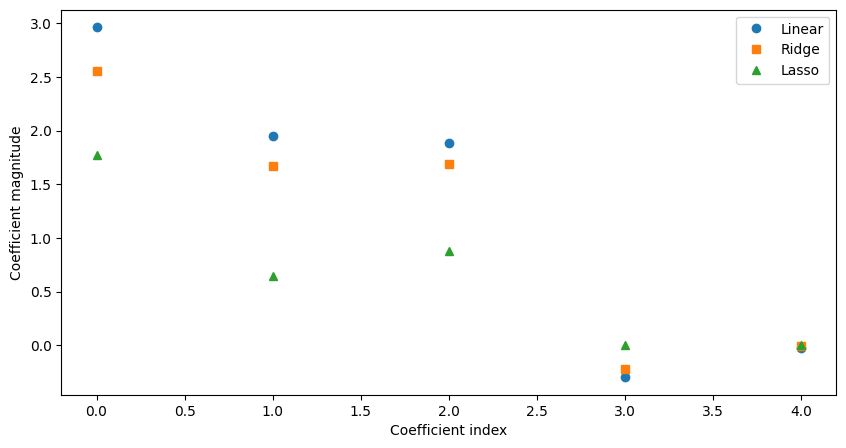

In [ ]:
# Plotting the coefficients
plt.figure(figsize=(10, 5))
plt.plot(linreg.coef_, 'o', label="Linear")
plt.plot(ridge_reg.coef_, 's', label="Ridge")
plt.plot(lasso_reg.coef_, '^', label="Lasso")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

### Summary

Regularization helps in reducing overfitting by adding a penalty to the loss function, which discourages the model from fitting the noise in the training data. L2 (Ridge) regularization shrinks coefficients uniformly, while L1 (Lasso) regularization can shrink some coefficients to zero, thus performing feature selection. Implementing regularization in Python using scikit-learn is straightforward, and it can significantly improve the generalization performance of your models.